In [176]:
'''
Código para testar funcionalidades com o hdf do modis
'''

'\nCódigo para testar funcionalidades com o hdf do modis\n'

In [177]:
import numpy as np
from pyhdf.SD import *
import os
import time
import pandas as pd
import matplotlib.pyplot as plt

In [178]:
lat_mara = -(3 + 12/60 + 46.70/3600)
lon_mara = -(60 + 35/60 + 53/3600)
coord_mara = np.array((lat_mara, lon_mara))
initial_time = time.mktime(time.strptime("00:00 01/01/1993", "%H:%M %d/%m/%Y"))

In [179]:
path = "/home/danilo/dados-ic/modis-aqua/MYD06_L2.A2013344.1815.006.2014268222951.hdf"
lat_mao = -(3 + 12/60 + 46.70/3600)
lon_mao = -(60 + 35/60 + 53/3600)

In [180]:
    sd = SD(path)
    lat = np.array(sd.select("Latitude")[:])
    lat_dist = np.abs(lat - lat_mao)

    lon = np.array(sd.select("Longitude")[:])
    lon_dist = np.abs(lon - lon_mao)

    cf = np.array(sd.select("Cloud_Fraction")[:])
    t = np.array(sd.select("Scan_Start_Time")[:]) + initial_time

    inds = (lat_dist < 1) & (lon_dist < 1)

    cf_avg = np.average(cf[inds])
    t_avg = np.average(t[inds])


In [181]:
len(lat[inds])

217

In [182]:
raw

,CloudFraction,Count,Time
0,NaN,0.0,NaN
1,0.817281,1736.0,1.433619e+09
2,0.751444,187.0,1.428179e+09
3,0.939661,590.0,1.437855e+09
4,0.760103,1933.0,1.445672e+09
5,NaN,0.0,NaN
6,NaN,0.0,NaN
7,0.091648,1930.0,1.406965e+09
8,0.958941,340.0,1.401136e+09
9,NaN,0.0,NaN


In [322]:
raw1 = pd.read_csv("modis-aqua.csv")
raw1 = raw1[~np.isnan(raw1.CloudFraction)]
raw2 = pd.read_csv("modis-terra.csv")
raw2 = raw2[~np.isnan(raw2.CloudFraction)]

raw3 = pd.read_csv("CF-TSI.csv")
raw3.CloudFraction = pd.to_numeric(raw3.CloudFraction, errors="coerce")
raw3 = raw3[~np.isnan(raw3.CloudFraction)]

raw4 = pd.read_csv("CF-XL.csv")
raw4.Longwave_CloudFraction = pd.to_numeric(raw4.Longwave_CloudFraction, errors="coerce")
raw4.Shortwave_CloudFraction = pd.to_numeric(raw4.Shortwave_CloudFraction, errors="coerce")
raw4 = raw4[~np.isnan(raw4.Longwave_CloudFraction)]
raw4 = raw4[~np.isnan(raw4.Shortwave_CloudFraction)]
raw4 = raw4[~np.isnan(raw4.XL_CloudFraction)]
raw4 = raw4[raw4.XL_CloudFraction <= 1]
raw4 = raw4[~np.isinf(raw4.XL_CloudFraction)]

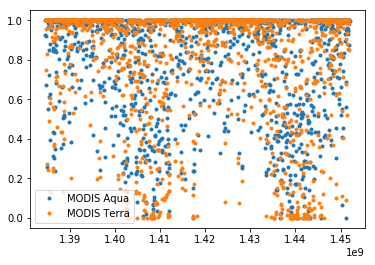

In [323]:
plt.plot(raw1.Time, raw1.CloudFraction, '.', label="MODIS Aqua")
plt.plot(raw2.Time, raw2.CloudFraction, '.', label="MODIS Terra")
#plt.plot(raw3.Time, raw3.CloudFraction, ',')
#plt.plot(raw4.Time, raw4.Shortwave_CloudFraction, ',')
plt.legend()
plt.plot()
plt.show()

In [324]:

plt.show()

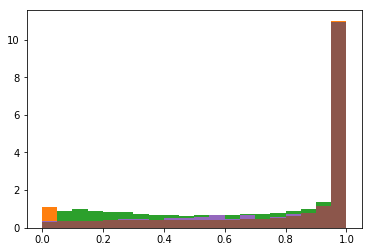

In [325]:
plt.hist(raw1.CloudFraction, bins=20, normed=True, label="MODIS-Aqua")
plt.hist(raw2.CloudFraction, bins=20, normed=True, label="MODIS-Terra")
plt.hist(raw3.CloudFraction, bins=20, normed=True, label="TSI")
plt.hist(raw4.Shortwave_CloudFraction, bins=20,  normed=True, label="RFA Longwave")
plt.hist(raw4.Shortwave_CloudFraction, bins=20,  normed=True, label="RFA Shortwave")
plt.hist(raw4.XL_CloudFraction, bins=20,  normed=True, range=(0, 1), label="Xie & Liu")
plt.show()

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


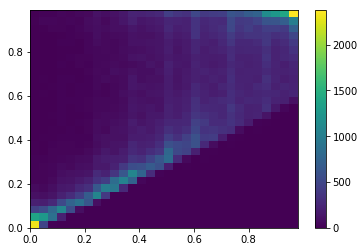

In [345]:
c = 0.99
raw5 = raw4[raw4.Shortwave_CloudFraction < c]
raw5 = raw5[raw4.XL_CloudFraction < c]
plt.hist2d(x=raw5.Shortwave_CloudFraction, y=raw5.XL_CloudFraction, bins=30)
plt.colorbar()
plt.show()